# Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Add the d2min file to the path
# Likely not necessary if you actually install the file permanently
import sys
sys.path.insert(0, "../")

from d2min import calculateD2Min

In [2]:
# Headers in the test data files are: xs, ys, radii
initialData = np.genfromtxt('testInitialState.txt', delimiter=',', skip_header=1)
finalData = np.genfromtxt('testFinalState.txt', delimiter=',', skip_header=1)

initialCenters = initialData[:,:2]
finalCenters = finalData[:,:2]
radii = initialData[:,2]

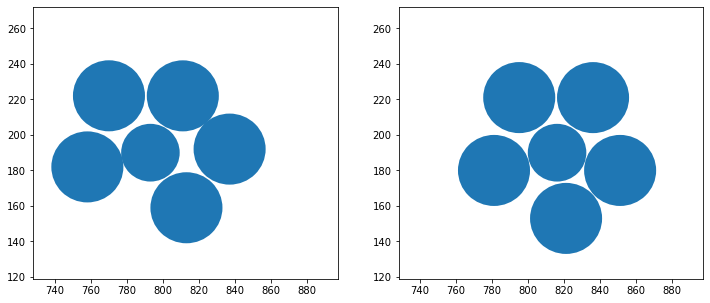

In [3]:
# Visualize what the initial and final state look like
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

xLim = [np.min(initialCenters[:,0])-30, np.max(initialCenters[:,0])+60]
yLim = [np.min(initialCenters[:,1])-40, np.max(initialCenters[:,1])+50]

for i in range(len(initialCenters)):
    c = plt.Circle(initialCenters[i], radii[i])
    ax[0].add_artist(c)
    c = plt.Circle(finalCenters[i], radii[i])
    ax[1].add_artist(c)
    
ax[0].set_xlim(xLim)
ax[0].set_ylim(yLim)
ax[1].set_xlim(xLim)
ax[1].set_ylim(yLim)

plt.savefig('test_particles.png')
plt.show()

In [4]:
# Calculate the d2min for this configuration
d2min, strain = calculateD2Min(initialCenters, finalCenters, normalize=True)

print(f'd2min: {d2min}')
print(f'Uniform strain tensor:\n {strain}')

d2min: 45.17664958207952
Uniform strain tensor:
 [[ 0.85612563  0.16744188]
 [-0.12802889  1.01981877]]


In [5]:
# Note that we don't provide any neighbor information, meaning all of the other
# particles are used.
# Since this example only has 6 particles, this is not an issue, but for
# real systems this will need to be specified probably like so
avgParticleRadius = np.mean(radii)
d2min, strain = calculateD2Min(initialCenters, finalCenters, interactionRadius=avgParticleRadius*3)

print(f'd2min: {d2min}')
print(f'Uniform strain tensor:\n {strain}')

d2min: 45.17664958207952
Uniform strain tensor:
 [[ 0.85612563  0.16744188]
 [-0.12802889  1.01981877]]
